# Recurrent Neural Networks

In this notebook, we train a RNN with the use of Keras.

In [2]:
!pip install keras

    100% |████████████████████████████████| 327kB 2.2MB/s 


In [3]:
import numpy as np
import pandas as pd
import keras 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# -- Keras Import
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing import image

from keras.datasets import imdb
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN

from keras.layers import Activation, TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping, ModelCheckpoint

%matplotlib inline

Using TensorFlow backend.


## 1. Load IMDB Database

In [4]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')


Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences


## 2. Visualize the Data

In [5]:
print('Example:')
print(X_train[:1])

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Example:
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])]
Pad sequences (samples x time)


## 3. Setup the Model

In [6]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(128))  
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


Build model...


## 4. Summary of the model

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


## 5. Compile the model

In [18]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Complete!')

Complete!


## 6. Train the Model

In [19]:
from keras.callbacks import ModelCheckpoint   

# Function to later visulaze the accuracy/performance of the model
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=32, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer,history], 
          verbose=2, shuffle=True)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 44s - loss: 0.3754 - acc: 0.8406 - val_loss: 0.5825 - val_acc: 0.6795

Epoch 00001: val_loss improved from inf to 0.58250, saving model to model.weights.best.hdf5
Epoch 2/10
 - 44s - loss: 0.4161 - acc: 0.8139 - val_loss: 0.4624 - val_acc: 0.7968

Epoch 00002: val_loss improved from 0.58250 to 0.46245, saving model to model.weights.best.hdf5
Epoch 3/10
 - 43s - loss: 0.3124 - acc: 0.8744 - val_loss: 0.4667 - val_acc: 0.8150

Epoch 00003: val_loss did not improve
Epoch 4/10
 - 43s - loss: 0.2667 - acc: 0.9022 - val_loss: 0.4750 - val_acc: 0.7971

Epoch 00004: val_loss did not improve
Epoch 5/10
 - 43s - loss: 0.2613 - acc: 0.9000 - val_loss: 0.5367 - val_acc: 0.7597

Epoch 00005: val_loss did not improve
Epoch 6/10
 - 43s - loss: 0.2349 - acc: 0.9114 - val_loss: 0.5560 - val_acc: 0.8007

Epoch 00006: val_loss did not improve
Epoch 7/10
 - 43s - loss: 0.1994 - acc: 0.9280 - val_loss: 0.5953 - val_acc: 0.7884

Epoch 00007: va

## 8. Load the Model with the Best Validation Accuracy

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## 9. Calculate Classification Accuracy on Test Set

In [22]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.79676


## 10. Visulalize the Accuracy of RNN Model

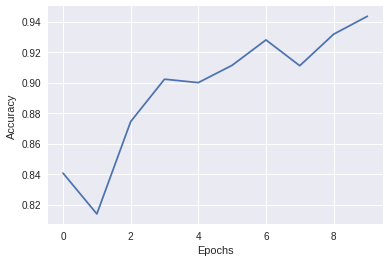

In [24]:
import numpy as np

accuracy = np.array(history.acc)

plt.plot(range(10), accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()